In [12]:
#constructing basis vectors
import numpy as np
import matplotlib.pyplot as plt

N=4
theta_cap = np.arange(0,2*np.pi,2*np.pi/N)
print("theta_cap=",theta_cap)
x1 = np.cos(0*theta_cap)
x2 = np.cos(1*theta_cap)
x3 = np.sin(2*theta_cap)
x4 = np.sin(3*theta_cap)


#Basis vectors stacked as columns of B matrix.
B = np.empty((4,4))
B[:,0] = x1
B[:,1] = x2
B[:,2] = x3
B[:,3] = x4

print("B=\n",B)


theta_cap= [0.         1.57079633 3.14159265 4.71238898]
B=
 [[ 1.0000000e+00  1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  6.1232340e-17  1.2246468e-16 -1.0000000e+00]
 [ 1.0000000e+00 -1.0000000e+00 -2.4492936e-16  3.6739404e-16]
 [ 1.0000000e+00 -1.8369702e-16  3.6739404e-16  1.0000000e+00]]


In [23]:
import numpy as np

# Define the Haar matrix
haar_matrix = (1/np.sqrt(2)) * np.array([[1, 1, 0, 0], [0, 0, 1, 1], [1, -1, 0, 0], [0, 0, 1, -1]])

print(haar_matrix)

H = haar_matrix

[[ 0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.70710678  0.70710678]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.          0.          0.70710678 -0.70710678]]


In [27]:
import numpy as np

def haar_matrix(n):
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haar_matrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1]) 

    # combine parts
    h = np.vstack((h_n, h_i))
    return h

# Test the function
n = 300
H = haar_matrix(n)
print(H)


[[  1.           1.           1.         ...   1.           1.
    1.        ]
 [  1.           1.           1.         ...  -1.          -1.
   -1.        ]
 [  1.41421356   1.41421356   1.41421356 ...  -0.          -0.
   -0.        ]
 ...
 [  0.          -0.           0.         ...  -0.           0.
   -0.        ]
 [  0.          -0.           0.         ... -16.           0.
   -0.        ]
 [  0.          -0.           0.         ...  -0.          16.
  -16.        ]]


In [24]:
import imageio

# Load the image
I = imageio.imread('sierpinski_triangle.png')


/tmp/ipykernel_459550/3514019950.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  I = imageio.imread('sierpinski_triangle.png')


In [31]:
import cv2

# Load the image
I = cv2.imread('sierpinski_triangle.png', cv2.IMREAD_GRAYSCALE)

# Resize the image to 512x512
I = cv2.resize(I, (512, 512))

# Now you can generate a 512x512 Haar matrix and perform the transformation
H = haar_matrix(512)
transformed_image = np.dot(np.dot(H, I), np.transpose(H))


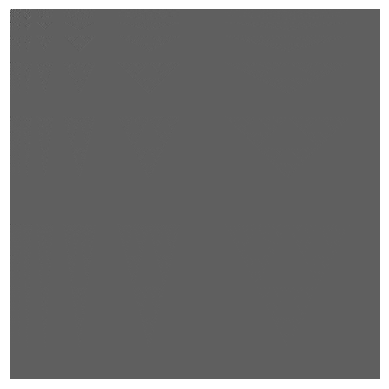

In [32]:
# Perform the transformation
transformed_image = np.dot(np.dot(H, I), np.transpose(H))

# Display the transformed image
plt.imshow(transformed_image, cmap='gray')
plt.axis('off')
plt.show()

